In [1]:
#Simple Linear Regression
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def coef_estimation(x, y):
    n = np.size(x) # no.of observation
    m_x, m_y = np.mean(x), np.mean(y) # mean of vector x and y
    SS_xy = np.sum(y*x) - n*m_y*m_x # cross-deviation and deviation about x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx #regression coefficients
    b_0 = m_y - b_1*m_x
    return(b_0, b_1)

In [21]:
#function will plot regression line as well as predict the response vector
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m", marker = "o", s = 30)#will plot actual points as scatter plot
    y_pred = b[0] + b[1]*x #the following script line will predict response vector
    #line will plot regression line and will put label on them
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [22]:
#function to provide dataset 
def main():
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([100, 300, 350, 500, 750, 800, 850, 900, 1050, 1250])
    b = coef_estimation(x, y)
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
    plot_regression_line(x, y, b)
   

Estimated coefficients:
b_0 = 154.5454545454545 
b_1 = 117.87878787878788


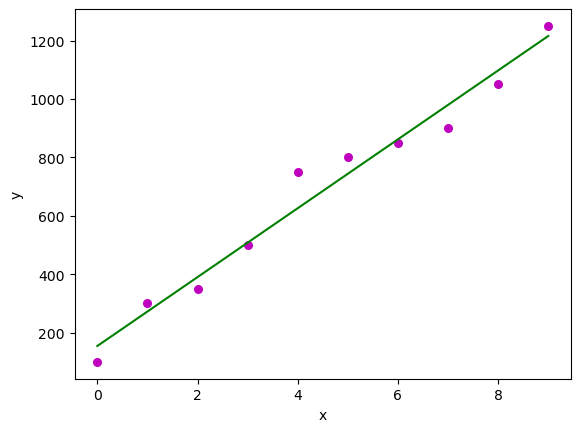

In [23]:
#calling the function we defined above
if __name__ == "__main__":
    main()

In [29]:
# Multiple Linear Regression
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
diabetes = datasets.load_diabetes()

In [38]:
X = diabetes.data[:, np.newaxis, 2]

In [45]:
X_train = X[:-30]
y_train = diabetes.target[:-30]
X_test = X[-30:]
y_test = diabetes.target[-30:]

In [46]:
#to train the model we need to create linear regression object 
regr = linear_model.LinearRegression()

In [47]:
#use training dataset for training the model
regr.fit(X_train, y_train)

LinearRegression()

In [48]:
#make prediction using the testing set as follows
y_pred = regr.predict(X_test)

In [49]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
   % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


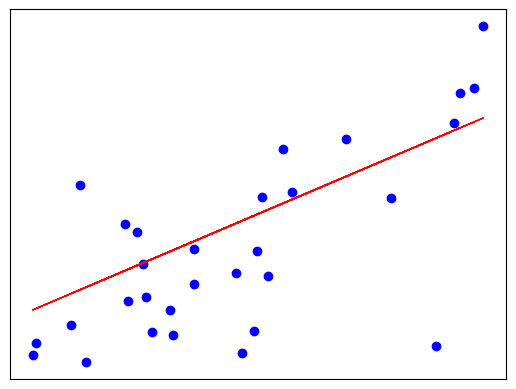

In [51]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()